**Name :Dhruvi Shah**

**Student ID:202211032**

# Importing Libraries

In [ ]:
import keras
import tensorflow as tf 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from keras.layers import Concatenate, Conv2D, MaxPooling2D, Flatten, Dense, Input,BatchNormalization,AveragePooling2D
from keras.models import Model
from sklearn.model_selection import train_test_split

#Applying the basic CNN model

In [ ]:
batch_size = 16 
num_classes = 10  # Number of class for the dataset
epochs = 15
data_augmentation = False

In [ ]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [ ]:
# Normalize the data. Before we need to connvert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTEN=> DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

In [ ]:
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
history = None  # For recording the history of trainning process.
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(x_train, y_train,
                                    batch_size=batch_size),
                                    epochs=epochs,
                                    validation_data=(x_test, y_test),
                                    workers=4)

Not using data augmentation.
Epoch 1/15
3125/3125 [==============================] - 308s 98ms/step - loss: 1.7422 - accuracy: 0.3608 - val_loss: 1.5188 - val_accuracy: 0.4554
Epoch 2/15
3125/3125 [==============================] - 286s 91ms/step - loss: 1.4007 - accuracy: 0.4935 - val_loss: 1.2683 - val_accuracy: 0.5416
Epoch 3/15
3125/3125 [==============================] - 284s 91ms/step - loss: 1.2575 - accuracy: 0.5512 - val_loss: 1.1570 - val_accuracy: 0.5901
Epoch 4/15
3125/3125 [==============================] - 284s 91ms/step - loss: 1.1505 - accuracy: 0.5908 - val_loss: 1.0529 - val_accuracy: 0.6252
Epoch 5/15
3125/3125 [==============================] - 285s 91ms/step - loss: 1.0625 - accuracy: 0.6239 - val_loss: 0.9722 - val_accuracy: 0.6570
Epoch 6/15
3125/3125 [==============================] - 294s 94ms/step - loss: 1.0061 - accuracy: 0.6464 - val_loss: 0.9338 - val_accuracy: 0.6722
Epoch 7/15
3125/3125 [==============================] - 290s 93ms/step - loss: 0.9583 - a

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


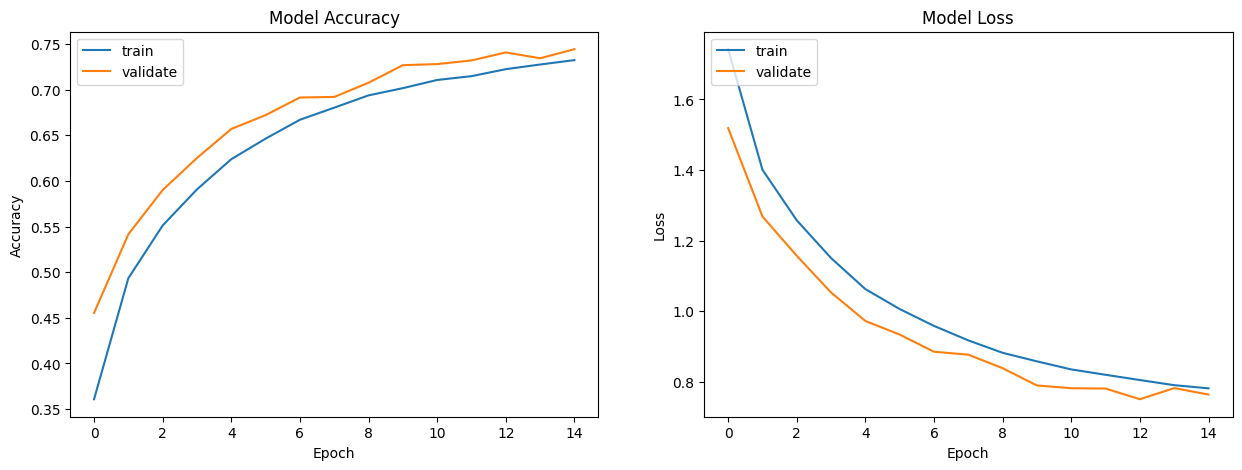

In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 [==============================] - 6s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


# Loading Dataset and Preprocessing

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# Convert class vectors to binary class matrices
num_classes = 10 
ytr = keras.utils.to_categorical(Y_train, num_classes) 
yval = keras.utils.to_categorical(Y_val, num_classes)
ytest = keras.utils.to_categorical(y_test, num_classes)

##Addition of layers in CNN

# CNN with Addition of layers 

In [ ]:
with tf.device('/GPU:0'):
  ip = Input(shape=(32, 32,3 ))
  conv1 = Conv2D(8, kernel_size=(3,3), activation='relu',padding='same')(ip)
  b1 = BatchNormalization()(conv1)
  conv2 = Conv2D(32, kernel_size=(3,3), activation='relu',padding='same')(b1)
  b2 = BatchNormalization()(conv2)
  conv3 = Conv2D(64, kernel_size=(3,3), activation='relu',padding='same')(b2)
  b3 = BatchNormalization()(conv3)
  conv4 = Conv2D(128, kernel_size=(3,3), activation='relu',padding='same')(b3)
  b4 = BatchNormalization()(conv4)
  conv5 = Conv2D(32, kernel_size=(3,3), activation='relu',padding='same')(b4)
  conv5= layers.Add()([conv2,conv5])
  b5 = BatchNormalization()(conv5)
  conv6 = Conv2D(32, kernel_size=(3,3), activation='relu',padding='same')(b5)
  b6 = BatchNormalization()(conv6)
  flatten = Flatten()(b6)
  d1 = Dense(64, activation='relu')(flatten)
  d2= Dense(32, activation='relu')(d1)
  d3=Dense(32, activation='relu')(d2)
  op = Dense(10, activation='softmax')(d3)
  modeladd = Model(inputs=ip, outputs=op)
  
  modeladd.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  
  
  callbacks = EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=1,
    restore_best_weights=True
  )

In [ ]:
historyadd = modeladd.fit(X_train, ytr,validation_data=(X_val, yval),batch_size=16,epochs=20,verbose=1,callbacks = [callbacks])  

Epoch 1/20
2813/2813 [==============================] - 41s 9ms/step - loss: 1.5672 - accuracy: 0.4210 - val_loss: 1.3614 - val_accuracy: 0.5082
Epoch 2/20
2813/2813 [==============================] - 27s 9ms/step - loss: 1.0812 - accuracy: 0.6181 - val_loss: 1.0573 - val_accuracy: 0.6334
Epoch 3/20
2813/2813 [==============================] - 25s 9ms/step - loss: 0.8568 - accuracy: 0.7025 - val_loss: 0.9376 - val_accuracy: 0.6750
Epoch 4/20
2813/2813 [==============================] - 26s 9ms/step - loss: 0.6861 - accuracy: 0.7634 - val_loss: 0.9193 - val_accuracy: 0.7028
Epoch 5/20
2813/2813 [==============================] - 25s 9ms/step - loss: 0.5357 - accuracy: 0.8156 - val_loss: 0.9592 - val_accuracy: 0.6950
Epoch 6/20
2813/2813 [==============================] - 25s 9ms/step - loss: 0.3973 - accuracy: 0.8623 - val_loss: 0.9598 - val_accuracy: 0.7128
Epoch 7/20
2813/2813 [==============================] - 25s 9ms/step - loss: 0.2963 - accuracy: 0.9002 - val_loss: 1.0546 - val_ac

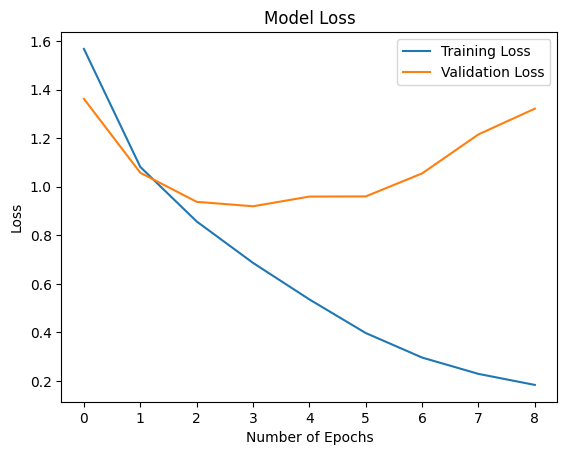

In [ ]:
plt.plot(historyadd.history['loss'], label='Training Loss')
plt.plot(historyadd.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()

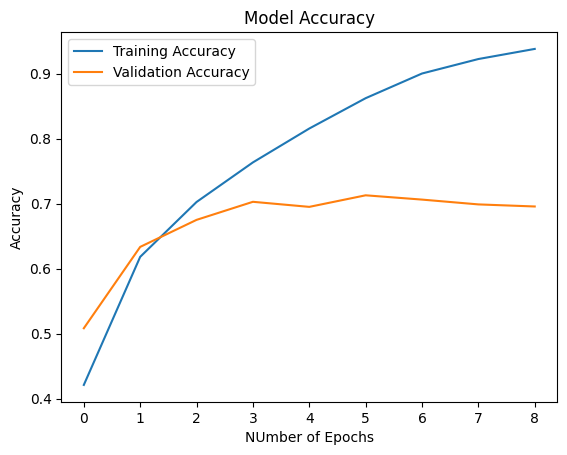

In [ ]:
plt.plot(historyadd.history['accuracy'], label='Training Accuracy')
plt.plot(historyadd.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('NUmber of Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#Concatenating layers of CNN

In [ ]:
with tf.device('/GPU:0'):
  ip = Input(shape=(32, 32,3 ))
  conv1 = Conv2D(16, kernel_size=(3,3), activation='relu',padding='same')(ip)
  b1 = BatchNormalization()(conv1)
  conv2 = Conv2D(32, kernel_size=(3,3), activation='relu',padding='same')(b1)
  b2 = BatchNormalization()(conv2)
  conv3 = Conv2D(64, kernel_size=(3,3), activation='relu',padding='same')(b2)
  cat23= layers.Concatenate()([b2,conv3])
  b3 = BatchNormalization()(cat23)
  conv4 = Conv2D(128, kernel_size=(3,3), activation='relu',padding='same')(b3)
  b4 = BatchNormalization()(conv4)
  conv5 = Conv2D(32, kernel_size=(3,3), activation='relu',padding='same')(b4)
  cat45= layers.Concatenate()([b4,conv5])
  b5 = BatchNormalization()(conv5)
  conv6 = Conv2D(32, kernel_size=(3,3), activation='relu',padding='same')(b5)
  b6 = BatchNormalization()(conv6)
  flatten = Flatten()(b6)
  d1 = Dense(32, activation='relu')(flatten)
  d2= Dense(64, activation='relu')(d1)
  d3=Dense(32, activation='relu')(d2)
  op = Dense(10, activation='softmax')(d3)
  modelcat = Model(inputs=ip, outputs=op)
  

In [ ]:
modelcat.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
callbacks = EarlyStopping(
    monitor="val_loss",
    patience=3,
    verbose=1,
    restore_best_weights=True
  )


In [ ]:
historycat = modelcat.fit(X_train, ytr,validation_data=(X_val, yval),batch_size=32,epochs=15,verbose=1)

Epoch 1/15
1407/1407 [==============================] - 31s 18ms/step - loss: 1.5657 - accuracy: 0.4208 - val_loss: 1.3670 - val_accuracy: 0.5282
Epoch 2/15
1407/1407 [==============================] - 23s 16ms/step - loss: 1.1101 - accuracy: 0.6041 - val_loss: 1.0286 - val_accuracy: 0.6374
Epoch 3/15
1407/1407 [==============================] - 24s 17ms/step - loss: 0.9016 - accuracy: 0.6837 - val_loss: 1.2785 - val_accuracy: 0.5868
Epoch 4/15
1407/1407 [==============================] - 20s 14ms/step - loss: 0.7525 - accuracy: 0.7372 - val_loss: 0.9242 - val_accuracy: 0.6818
Epoch 5/15
1407/1407 [==============================] - 21s 15ms/step - loss: 0.6075 - accuracy: 0.7868 - val_loss: 0.9316 - val_accuracy: 0.6936
Epoch 6/15
1407/1407 [==============================] - 20s 14ms/step - loss: 0.4779 - accuracy: 0.8344 - val_loss: 0.9974 - val_accuracy: 0.6864
Epoch 7/15
1407/1407 [==============================] - 20s 14ms/step - loss: 0.3664 - accuracy: 0.8731 - val_loss: 1.0689 -

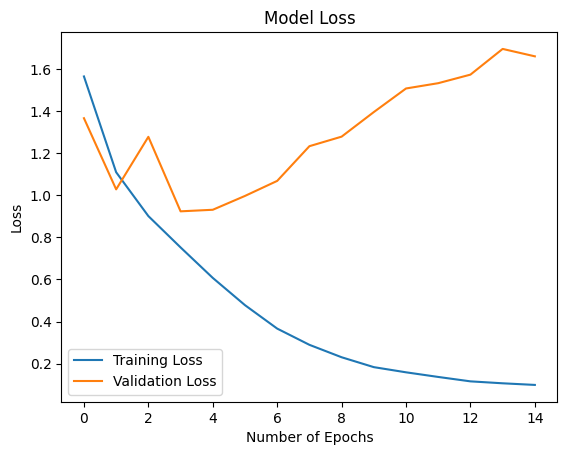

In [ ]:
plt.plot(historycat.history['loss'], label='Training Loss')
plt.plot(historycat.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()


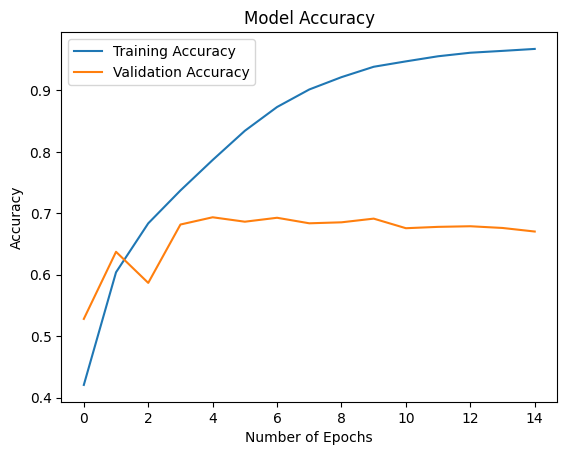

In [ ]:
plt.plot(historycat.history['accuracy'], label='Training Accuracy')
plt.plot(historycat.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#Resnet for demonstrating skip connections

In [ ]:
from keras.datasets import cifar10
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Add, Activation
from keras.models import Model
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [ ]:

# Convert the labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [ ]:

# Define the input shape
inputs = Input(shape=(32, 32, 3))

# First convolutional block
x = Conv2D(32, (3, 3), padding='same')(inputs)
x = Activation('relu')(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2))(x)

# Residual blocks
residual = Conv2D(64, (1, 1), strides=(2, 2), padding='same')(x)
residual = Activation('relu')(residual)
x = Conv2D(64, (3, 3), strides=(2, 2), padding='same')(x)
x = Add()([x, residual])
x = Activation('relu')(x)
residual = Conv2D(128, (1, 1), strides=(2, 2), padding='same')(x)
residual = Activation('relu')(residual)
x = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
x = Add()([x, residual])
x = Activation('relu')(x)

# Final layers
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
782/782 [==============================] - 9s 8ms/step - loss: 2.0568 - accuracy: 0.4297 - val_loss: 1.2781 - val_accuracy: 0.5331
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 1.2016 - accuracy: 0.5741 - val_loss: 1.1722 - val_accuracy: 0.5860
Epoch 3/10
782/782 [==============================] - 6s 7ms/step - loss: 1.0058 - accuracy: 0.6462 - val_loss: 1.0521 - val_accuracy: 0.6350
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 0.8761 - accuracy: 0.6925 - val_loss: 1.0355 - val_accuracy: 0.6437
Epoch 5/10
782/782 [==============================] - 6s 7ms/step - loss: 0.7733 - accuracy: 0.7284 - val_loss: 1.0275 - val_accuracy: 0.6505
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 0.6710 - accuracy: 0.7646 - val_loss: 1.0411 - val_accuracy: 0.6545
Epoch 7/10
782/782 [==============================] - 5s 7ms/step - loss: 0.5942 - accuracy: 0.7899 - val_loss: 1.0674 - val_accuracy: 0.6616
Epoch 

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 1.2912 - accuracy: 0.6649
Test loss: 1.2912402153015137
Test accuracy: 0.664900004863739


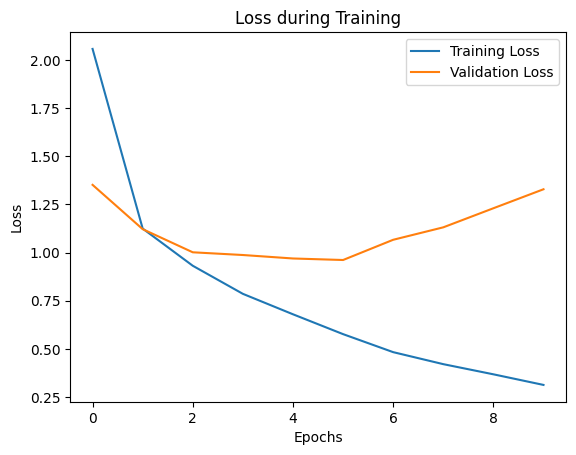

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


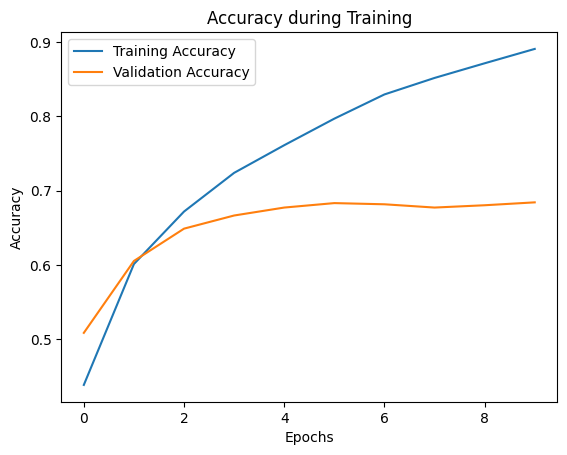

In [ ]:
# Plot the accuracy and loss during training
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy during Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()